# Comparison of accuracy on congruent vs. incongruent trials

In [25]:
%cd /Users/Jake/OReilly_Lab/projects/COGS/warp/warp/warped-map/notebooks/

/Users/Jake/OReilly_Lab/projects/COGS/warp/warp/warped-map/notebooks


In [26]:
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import binom_test

#### Function for loading results

In [27]:
def load_results(results_fn, accs_type='train_accs'):
    results_dir = '../../results/'
    results_path = os.path.join(results_dir,results_fn)
    
    with open(results_path, 'rb') as f:
        data = pickle.load(f)
        
    results = data['results']
    cong_accs = []
    incong_accs = []
    for run in results:
        cong_accs.append([s['cong_acc'] for s in run[accs_type]])
        incong_accs.append([s['incong_acc'] for s in run[accs_type]])
    cong_accs = np.array(cong_accs)
    incong_accs = np.array(incong_accs)
    return cong_accs, incong_accs

#### Function for testing whether accuracies are significantly different from chance

Binomial test assuming that samples from all runs are i.i.d.

Train set = 160 samples (80 congruent, 80 incongruent)

Test set = 32 samples (16 congruent, 16 incongruent)

All  = 384 samples (192 congruent, 192 incongruent)

(The reason "All" is more than 160+32 is that a lot of samples were excluded from both train and test based on the fact that train only had 1-rank differences and test had to have the "hubs" mediating relationships)

In [28]:
def get_significance(accs, accs_type):
    n_runs, n_checkpoints = cong_accs.shape
    
    # Number of trials per run
    if accs_type == 'train_accs':
        n = 64
    elif accs_type == 'test_accs':
        n = 12
    elif accs_type == 'analyze_accs':
        n = 144
    N = n*n_runs # total number of trials
    
    # Convert accuracies to successes
    successes = accs * n
    for s in successes.flatten():
        if not s.is_integer():
            print(s)
    successes = np.sum(successes, axis=0)
    
    # Binomial test
    p_vals = []
    for s in successes:
        p_val = binom_test(s, N, p=0.5)
        p_vals.append(p_val)
    
    return p_vals
    
    
    

#### Function for plotting accuracies

In [29]:
def plot_accuracy(cong_accs, incong_accs, cong_p, incong_p, analyze_every, title, save_fn):
    n_runs, n_checkpoints = cong_accs.shape

    # Compute mean and standard deviation for error bars
    cong_mean = np.mean(cong_accs, axis=0)
    incong_mean = np.mean(incong_accs, axis=0)

    cong_sem = np.std(cong_accs, axis=0) / np.sqrt(len(cong_accs))
    incong_sem = np.std(incong_accs, axis=0) / np.sqrt(len(incong_accs))
    
    # Plot
    fig, ax = plt.subplots()
    x = np.arange(n_checkpoints)*analyze_every
    ax.errorbar(x, cong_mean, yerr=cong_sem, c='tab:green')
    ax.errorbar(x, incong_mean, yerr=incong_sem, c='tab:orange')
    plt.xlabel('Steps')
    plt.ylabel('Accuracy')
    plt.ylim([-0.1,1.1])
    plt.title("Accuracy on congruent trials improves first")
    ax.legend(["Congruent", "Incongruent"])
    plt.axhline(y=0.5, color='black', linestyle='--')
    
    # Add asterisks for significance level
    for i in range(n_checkpoints):
        x_coord = x[i]
        y_coord_cong = cong_mean[i]
        y_coord_incong = incong_mean[i]
        if cong_p[i] < 0.05:
            plt.plot(x_coord, y_coord_cong, marker='x', color='blue')
        if incong_p[i] < 0.05:
            plt.plot(x_coord, y_coord_incong, marker='x', color='blue')
    
    
    # Save figure
    if save_fn is not None:
        plt.savefig(save_fn, dpi=1000, format='eps', bbox_inches='tight')
        
    plt.show()

## MLP

#### Accuracies on train samples

In [30]:
results_fn = 'mlp.P'
accs_type = 'train_accs'
analyze_every = 50
title = "MLP"
save_fn = '../../figures/mlp_cong_incong_acc_train.eps'

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


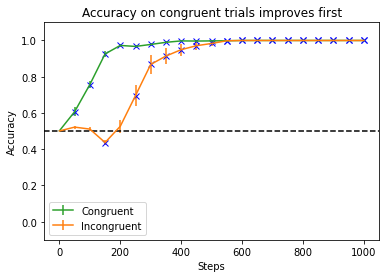

In [31]:
cong_accs, incong_accs = load_results(results_fn, accs_type)
cong_p = get_significance(cong_accs, accs_type)
incong_p = get_significance(incong_accs, accs_type)
plot_accuracy(cong_accs, incong_accs, cong_p, incong_p, analyze_every, title, save_fn)

#### Accuracies on test samples

In [32]:
results_fn = 'mlp.P'
accs_type = 'test_accs'
analyze_every = 50
title = "MLP"
save_fn = '../../figures/mlp_cong_incong_acc_test.eps'

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


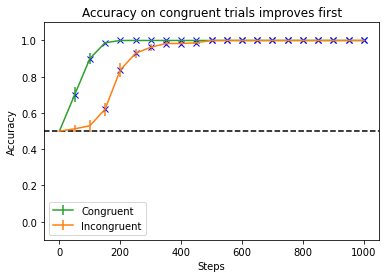

In [33]:
cong_accs, incong_accs = load_results(results_fn, accs_type)
cong_p = get_significance(cong_accs, accs_type)
incong_p = get_significance(incong_accs, accs_type)
plot_accuracy(cong_accs, incong_accs, cong_p, incong_p, analyze_every, title, save_fn)

#### Accuracies on all samples

In [34]:
results_fn = 'mlp.P'
accs_type = 'analyze_accs'
analyze_every = 50
title = "MLP"
save_fn = '../../figures/mlp_cong_incong_acc_all.eps'

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


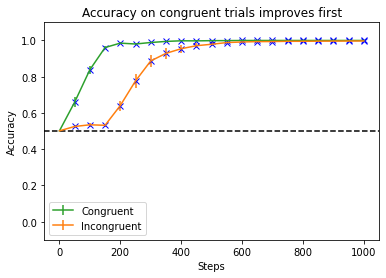

In [35]:
cong_accs, incong_accs = load_results(results_fn, accs_type)
cong_p = get_significance(cong_accs, accs_type)
incong_p = get_significance(incong_accs, accs_type)
plot_accuracy(cong_accs, incong_accs, cong_p, incong_p, analyze_every, title, save_fn)

## RNN

#### Accuracies on train set

In [99]:
results_fn = 'rnn.P'
analyze_every = 50
accs_type = 'train_accs'
title = "RNN"
save_fn = '../../figures/rnn_cong_incong_acc_train.eps'

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


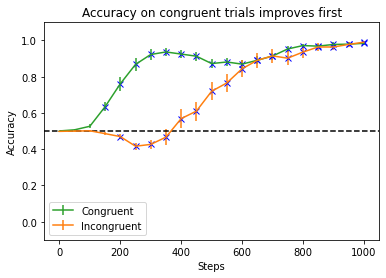

In [100]:
cong_accs, incong_accs = load_results(results_fn, accs_type)
cong_p = get_significance(cong_accs, accs_type)
incong_p = get_significance(incong_accs, accs_type)
plot_accuracy(cong_accs, incong_accs, cong_p, incong_p, analyze_every, title, save_fn)

#### Accuracies on test set

In [38]:
results_fn = 'rnn.P'
analyze_every = 50
accs_type = 'test_accs'
title = "RNN"
save_fn = '../../figures/rnn_cong_incong_acc_test.eps'

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


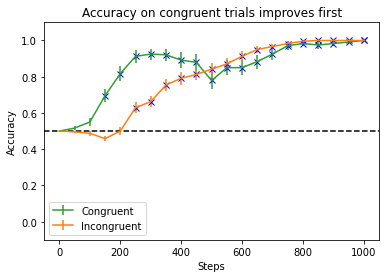

In [39]:
cong_accs, incong_accs = load_results(results_fn, accs_type)
cong_p = get_significance(cong_accs, accs_type)
incong_p = get_significance(incong_accs, accs_type)
plot_accuracy(cong_accs, incong_accs, cong_p, incong_p, analyze_every, title, save_fn)

#### Accuracies on all samples

In [42]:
results_fn = 'rnn.P'
analyze_every = 50
accs_type = 'analyze_accs'
title = "RNN"
save_fn = '../../figures/rnn_cong_incong_acc_all.eps'

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


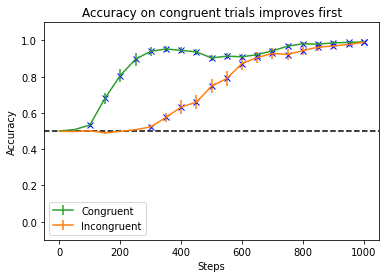

In [43]:
cong_accs, incong_accs = load_results(results_fn, accs_type)
cong_p = get_significance(cong_accs, accs_type)
incong_p = get_significance(incong_accs, accs_type)
plot_accuracy(cong_accs, incong_accs, cong_p, incong_p, analyze_every, title, save_fn)

### Figure out why incongruent accuracy is less than 50%

In [17]:
%cd /Users/Jake/OReilly_Lab/projects/COGS/warp/warp/warped-map/
from data import get_loaders

/Users/Jake/OReilly_Lab/projects/COGS/warp/warp/warped-map


In [22]:
class Arguments():
    def __init__(self):
        pass
args = Arguments()
args.grid_size = 4
args.use_images = False
args.image_dir = None
args.bs = 32
args.training_regime = 'grouped'
args.inner_4x4 = False
train_loader, test_loader, analyze_loader = get_loaders(args)

In [77]:
def wins_model_acc(loader):
    wins = {}
    for batch in train_loader:
        ys = batch[3]
        info = batch[4]
        locs1 = info['loc1']
        locs2 = info['loc2']
        for loc1, loc2, y in zip(locs1, locs2, ys):
            if loc1 not in wins:
                wins[loc1] = 0
            if loc2 not in wins:
                wins[loc2] = 0
            if y == 0:
                wins[loc2] += 1
            elif y == 1:
                wins[loc1] += 1

    cong_correct = []
    incong_correct = []
    for batch in loader:
        ys = batch[3]
        info = batch[4]
        locs1 = info['loc1']
        locs2 = info['loc2']
        congs = info['cong']
        for loc1, loc2, y, cong in zip(locs1, locs2, ys, congs):
            if wins[loc1] > wins[loc2]:
                pred = 1
            elif wins[loc1] < wins[loc2]:
                pred = 0
            else:
                pred = 0.5
            correct = 1 - abs(pred - y)
            if cong == 1:
                cong_correct.append(correct)
            elif cong == -1:
                incong_correct.append(correct)
    print("Congruent Accuracy:", np.mean(cong_correct))
    print("Incongruent Accuracy:", np.mean(incong_correct))
    return wins

In [95]:
wins = wins_model_acc(train_loader)

Congruent Accuracy: 0.796875
Incongruent Accuracy: 0.390625


In [96]:
wins = wins_model_acc(test_loader)

Congruent Accuracy: 0.9166666666666666
Incongruent Accuracy: 0.5


In [97]:
wins = wins_model_acc(analyze_loader)

Congruent Accuracy: 0.8472222222222222
Incongruent Accuracy: 0.5


In [98]:
for k in sorted(wins.keys()):
    print(k, ":", wins[k])

(0, 0) : 0
(0, 1) : 4
(0, 2) : 10
(0, 3) : 6
(1, 0) : 8
(1, 1) : 12
(1, 2) : 14
(1, 3) : 10
(2, 0) : 6
(2, 1) : 14
(2, 2) : 16
(2, 3) : 16
(3, 0) : 6
(3, 1) : 14
(3, 2) : 12
(3, 3) : 12
